In [85]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
from datetime import datetime
import pandas as pd

mpl.rcParams['savefig.dpi'] = 100 
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 40})

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

import matplotlib.dates as mdates
from collections import defaultdict
import matplotlib

In [86]:
with open("/Users/abhishekkadian/Downloads/yellow_14_15.csv") as f:
    lines = f.readlines()

In [87]:
lines[:2]

['location_id,event,year,month,day,passengers,distance,fare,count\n',
 '1,PU,2014,1,1,79,8.81,3607.59,47\n']

In [88]:
yellow_data = []
for line in lines[1:]:
    L = line.strip().split(",")
    date = L[3] + "/" + "1" + "/" + L[2]
    location_id = L[0]
    count = L[-1]
    yellow_data.append((date, location_id, count))

In [89]:
yellow_data_counts = defaultdict(int)

In [90]:
for d in yellow_data:
    yellow_data_counts[d[0]] += int(d[2])

In [91]:
yellow_plot_dates = []
yellow_plot_trips = []

for k in yellow_data_counts:
    yellow_plot_dates.append(k)
    yellow_plot_trips.append(yellow_data_counts[k])

In [92]:
dates = [datetime.strptime(x, '%m/%d/%Y') for x in yellow_plot_dates]

In [93]:
A_yellow = [(x, y) for x, y in zip(dates, yellow_plot_trips)]

In [94]:
dates[0]

datetime.datetime(2015, 7, 1, 0, 0)

In [95]:
A_yellow.sort()

In [98]:
A_yellow[:10]

[(datetime.datetime(2014, 1, 1, 0, 0), 13579589),
 (datetime.datetime(2014, 2, 1, 0, 0), 12850362),
 (datetime.datetime(2014, 3, 1, 0, 0), 15154941),
 (datetime.datetime(2014, 4, 1, 0, 0), 14304832),
 (datetime.datetime(2014, 5, 1, 0, 0), 14402929),
 (datetime.datetime(2014, 6, 1, 0, 0), 13434207),
 (datetime.datetime(2014, 7, 1, 0, 0), 12741234),
 (datetime.datetime(2014, 8, 1, 0, 0), 12339043),
 (datetime.datetime(2014, 9, 1, 0, 0), 13098223),
 (datetime.datetime(2014, 10, 1, 0, 0), 13993312)]

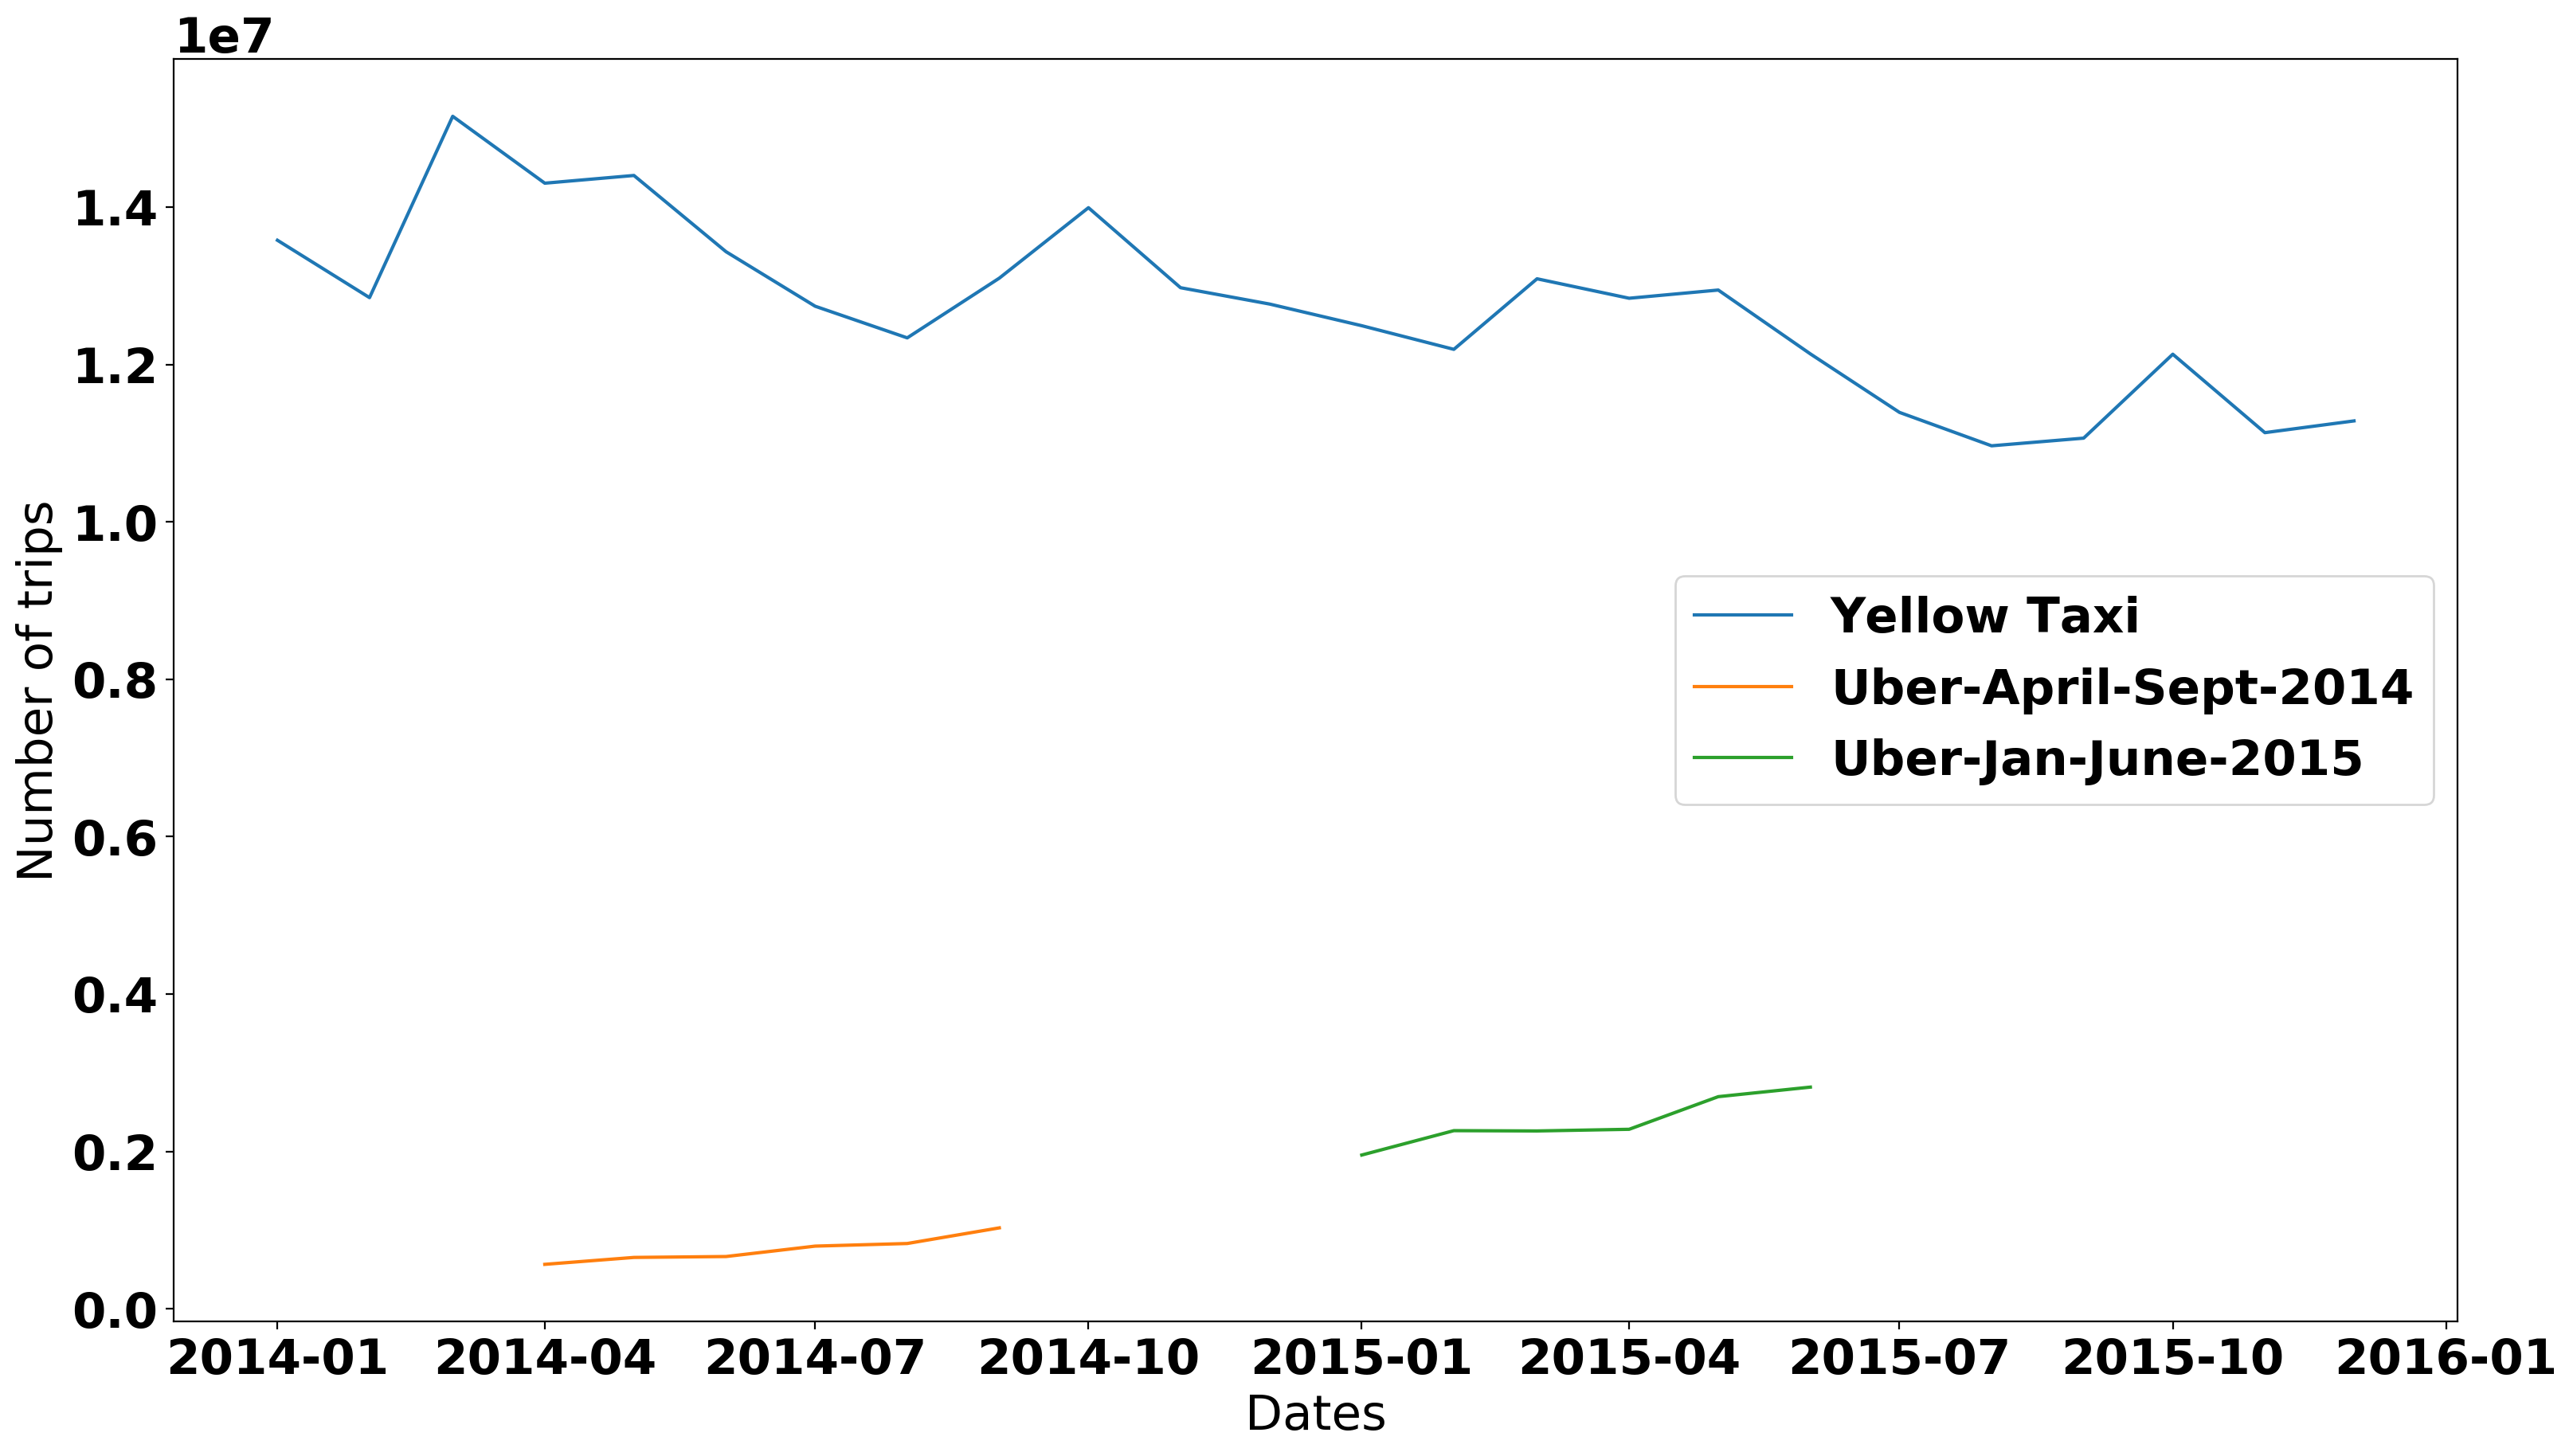

In [242]:
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xlabel("Dates")
plt.ylabel("Number of trips")

plt.plot([a[0] for a in A_yellow], [a[1] for a in A_yellow], label="Yellow Taxi")
plt.plot([a[0] for a in A], [a[1] for a in A], label="Uber-April-Sept-2014")
plt.plot([a[0] for a in new_A], [a[1] for a in new_A], label="Uber-Jan-June-2015")

plt.legend()
plt.plot()

plt.savefig("yellow-taxi-vs-uber.jpg", bbox_inches="tight")

In [207]:
with open("/Users/abhishekkadian/Documents/Github/ds1004/uber/uber_aprsept_count_trips.csv") as f:
    lines = f.readlines()

In [208]:
lines[:5]

['4/1/2014,14546\n',
 '4/10/2014,20041\n',
 '4/11/2014,20420\n',
 '4/12/2014,18170\n',
 '4/13/2014,12112\n']

In [209]:
uber_plot_dates = [x.split(",")[0] for x in lines]
uber_plot_trips = [x.split(",")[1] for x in lines]

In [210]:
uber_dict = defaultdict(int)

In [211]:
for a, b in zip(uber_plot_dates, uber_plot_trips):
    L = a.split("/")
    curr_date = L[0] + "/1/" + L[2]
    uber_dict[curr_date] += int(b)

In [212]:
uber_dict

defaultdict(int,
            {'4/1/2014': 564516,
             '5/1/2014': 652435,
             '6/1/2014': 663844,
             '7/1/2014': 796121,
             '8/1/2014': 829275,
             '9/1/2014': 1028136})

In [213]:
new_uber_dates = []
new_uber_counts = []

for k, v in uber_dict.items():
    new_uber_dates.append(k)
    new_uber_counts.append(v)

In [214]:
uber_dates = [datetime.strptime(x, '%m/%d/%Y') for x in new_uber_dates]

In [217]:
A = [(x, y) for x, y in zip(uber_dates, new_uber_counts)]

In [218]:
A.sort()

In [219]:
A

[(datetime.datetime(2014, 4, 1, 0, 0), 564516),
 (datetime.datetime(2014, 5, 1, 0, 0), 652435),
 (datetime.datetime(2014, 6, 1, 0, 0), 663844),
 (datetime.datetime(2014, 7, 1, 0, 0), 796121),
 (datetime.datetime(2014, 8, 1, 0, 0), 829275),
 (datetime.datetime(2014, 9, 1, 0, 0), 1028136)]

In [221]:
with open("/Users/abhishekkadian/Documents/Github/ds1004/uber/uber_janjune_count_trips.csv") as f:
    lines = f.readlines()

In [222]:
lines[-5:]

['2015-06-26,99508\n',
 '2015-06-27,136193\n',
 '2015-06-28,93108\n',
 '2015-06-29,74430\n',
 '2015-06-30,82627\n']

In [223]:
uber_plot_dates = [x.split(",")[0] for x in lines]
uber_plot_trips = [x.split(",")[1] for x in lines]

In [224]:
uber_dict = defaultdict(int)

In [225]:
for a, b in zip(uber_plot_dates, uber_plot_trips):
    L = a.split("-")
    curr_date = L[1] + "/1/" + L[0]
    uber_dict[curr_date] += int(b)

In [226]:
uber_dict

defaultdict(int,
            {'01/1/2015': 1953801,
             '02/1/2015': 2263620,
             '03/1/2015': 2259773,
             '04/1/2015': 2280837,
             '05/1/2015': 2695553,
             '06/1/2015': 2816895})

In [227]:
new_uber_dates = []
new_uber_counts = []

for k, v in uber_dict.items():
    new_uber_dates.append(k)
    new_uber_counts.append(v)

In [228]:
uber_dates = [datetime.strptime(x, '%m/%d/%Y') for x in new_uber_dates]

In [229]:
new_A = [(x, y) for x, y in zip(uber_dates, new_uber_counts)]

In [230]:
new_A.sort()

In [231]:
new_A

[(datetime.datetime(2015, 1, 1, 0, 0), 1953801),
 (datetime.datetime(2015, 2, 1, 0, 0), 2263620),
 (datetime.datetime(2015, 3, 1, 0, 0), 2259773),
 (datetime.datetime(2015, 4, 1, 0, 0), 2280837),
 (datetime.datetime(2015, 5, 1, 0, 0), 2695553),
 (datetime.datetime(2015, 6, 1, 0, 0), 2816895)]

In [244]:
earlier_uber_counts = [564516, 652435, 663844, 796121, 829275, 1028136]

In [245]:
uber_trips = earlier_uber_counts + new_uber_counts

In [248]:
A

[(datetime.datetime(2014, 4, 1, 0, 0), 564516),
 (datetime.datetime(2014, 5, 1, 0, 0), 652435),
 (datetime.datetime(2014, 6, 1, 0, 0), 663844),
 (datetime.datetime(2014, 7, 1, 0, 0), 796121),
 (datetime.datetime(2014, 8, 1, 0, 0), 829275),
 (datetime.datetime(2014, 9, 1, 0, 0), 1028136)]

In [247]:
A_yellow

[(datetime.datetime(2014, 1, 1, 0, 0), 13579589),
 (datetime.datetime(2014, 2, 1, 0, 0), 12850362),
 (datetime.datetime(2014, 3, 1, 0, 0), 15154941),
 (datetime.datetime(2014, 4, 1, 0, 0), 14304832),
 (datetime.datetime(2014, 5, 1, 0, 0), 14402929),
 (datetime.datetime(2014, 6, 1, 0, 0), 13434207),
 (datetime.datetime(2014, 7, 1, 0, 0), 12741234),
 (datetime.datetime(2014, 8, 1, 0, 0), 12339043),
 (datetime.datetime(2014, 9, 1, 0, 0), 13098223),
 (datetime.datetime(2014, 10, 1, 0, 0), 13993312),
 (datetime.datetime(2014, 11, 1, 0, 0), 12976482),
 (datetime.datetime(2014, 12, 1, 0, 0), 12768691),
 (datetime.datetime(2015, 1, 1, 0, 0), 12493516),
 (datetime.datetime(2015, 2, 1, 0, 0), 12193159),
 (datetime.datetime(2015, 3, 1, 0, 0), 13089901),
 (datetime.datetime(2015, 4, 1, 0, 0), 12842551),
 (datetime.datetime(2015, 5, 1, 0, 0), 12946851),
 (datetime.datetime(2015, 6, 1, 0, 0), 12135475),
 (datetime.datetime(2015, 7, 1, 0, 0), 11391948),
 (datetime.datetime(2015, 8, 1, 0, 0), 10967281

In [246]:
uber_trips

[564516,
 652435,
 663844,
 796121,
 829275,
 1028136,
 2263620,
 1953801,
 2280837,
 2816895,
 2695553,
 2259773]

In [249]:
yellow_trips = [14304832, 14402929, 13434207, 12741234, 12339043, 13098223, 12493516, 12193159, 13089901, 12842551, 12946851, 12135475]

In [252]:
import numpy as np

In [253]:
np.corrcoef(yellow_trips, uber_trips)[0, 1]

-0.52866019040215828